In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline

In [2]:
class dataset:
    kdd_train_2labels = pd.read_pickle("dataset/kdd_train_2labels.pkl")
    kdd_train_2labels_y = pd.read_pickle("dataset/kdd_train_2labels_y.pkl")
    
    kdd_test_2labels = pd.read_pickle("dataset/kdd_test_2labels.pkl")
    kdd_test_2labels_y = pd.read_pickle("dataset/kdd_test_2labels_y.pkl")
    
    kdd_train_5labels = pd.read_pickle("dataset/kdd_train_5labels.pkl")
    kdd_train_5labels_y = pd.read_pickle("dataset/kdd_train_5labels_y.pkl")
    
    kdd_test_5labels = pd.read_pickle("dataset/kdd_test_5labels.pkl")
    kdd_test_5labels_y = pd.read_pickle("dataset/kdd_test_5labels_y.pkl")
    

In [3]:
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import metrics
import time 
from sklearn.decomposition import SparsePCA

In [4]:
x_train, y_train = dataset.kdd_train_2labels.iloc[:,:-2], dataset.kdd_train_2labels_y
x_test, y_test = dataset.kdd_test_2labels.iloc[:,:-2], dataset.kdd_test_2labels_y

In [5]:
pca_analysis = SparsePCA(n_components=2)
x_train_analysis = pca_analysis.fit_transform(x_train)
y_train_analysis = dataset.kdd_train_2labels.iloc[:,-2]

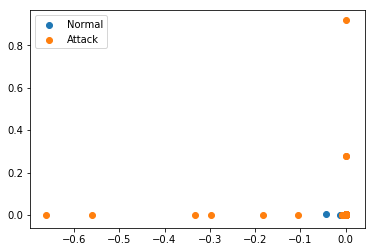

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x = x_train_analysis[y_train_analysis==0,0], y = x_train_analysis[y_train_analysis==0,1], label = 'Normal')
plt.scatter(x = x_train_analysis[y_train_analysis==1,0], y = x_train_analysis[y_train_analysis==1,1], label = 'Attack')

plt.legend()

In [7]:
pca = SparsePCA(n_components=10)

In [ ]:
#names_noscaling = ["RBF SVM", "Decision Tree", "Random Forest", "Naive Bayes"]
names_noscaling = ["Decision Tree", "Random Forest"]
classifiers_noscaling = [
                        DecisionTreeClassifier(),
                        RandomForestClassifier()
                        ]

names_withscaling = ["SVC", "Non - Linear SVM", "AdaBoost", "Naive Bayes"]
classifiers_withscaling = [SVC(), NuSVC(),
                            AdaBoostClassifier(), GaussianNB()]

score = collections.namedtuple("score", ["name", "valid_score" ,"test_score", 'time_taken'])
scores = []
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [ ]:
for name, clf in zip(names_noscaling, classifiers_noscaling):
    print("Classifier: {}".format(name))
    start_time = time.perf_counter()
    
    clf_p = make_pipeline(clf)    
    valid_score = cross_val_score(clf_p, x_train, y_train, cv=cv)
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, y_pred) 
    
    scores.append(score(name, valid_score.mean(), test_acc, time.perf_counter() - start_time))
    print("Score: {} \n".format(test_acc))

for name, clf in zip(names_withscaling, classifiers_withscaling):
    print("Classifier: {}".format(name))
    
    clf_p = make_pipeline(preprocessing.StandardScaler(), clf)    
    valid_score = cross_val_score(clf_p, x_train, y_train, cv=cv)
    
    scaler = preprocessing.StandardScaler().fit(x_train)
    clf.fit(scaler.transform(x_train), y_train)
    y_pred = clf.predict(scaler.transform(x_test))
    test_acc = metrics.accuracy_score(y_test, y_pred) 
    
    scores.append(score(name, valid_score.mean(), test_acc, time.perf_counter() - start_time))
    print("Score: {} \n".format(test_acc))

Classifier: Decision Tree
Score: 0.4316004258339248 

Classifier: Random Forest
Score: 0.44087118523775726 

Classifier: SVC
Score: 0.33206174591909154 

Classifier: Non - Linear SVM
Score: 0.5549591909155429 

Classifier: AdaBoost
Score: 0.43727821149751595 

Classifier: Naive Bayes
Score: 0.5449343506032647 



In [ ]:
pd.DataFrame(scores)

,name,valid_score,test_score,time_taken
0,Decision Tree,0.992586,0.431600,17.264962
1,Random Forest,0.994693,0.440871,33.555924
2,SVC,0.960417,0.332062,1244.475453
3,Non - Linear SVM,0.903906,0.554959,10601.877003
4,AdaBoost,0.974352,0.437278,10704.173392
5,Naive Bayes,0.902552,0.544934,10705.082242


In [ ]:
#Naive Bayes 3.4GB RAM